# Binterview

Objective #1
- Tell us the conversion rate of Pilot Opportunities to Annual Opportunities
  - On the opportunity object, there is a unique id that connects pilots opportunities to annuals
  - Annuals are defined as Type = Bulk
  - Pilots and Annuals are related upon the pilot being won
- What is the likelihood that an annual will be won when creating a pilot?
- What is the likelihood that an annual will be won when winning a pilot?

Objective #2
- Of all the sessions requested how many are sold?
  - All Opportunities have a Session Request and all Session Requests that are Accepted are associated with the Session Record
- What requested Research Product is most likely to be sold? Explain how you came to that conclusion.
  - Sessions have Service Requests Records related to them, these records are the Products that are being requested by the sales team and relate back to the Product in our Product Catalog.

Objective #3
- What is the average Booking value of Opportunities with sessions sold since July?

## Imports

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as datetime

#SQL
import mysql.connector
import os

In [119]:
# Import Salesforce data
contracts_df = pd.read_csv('contracts.csv')
opps_df = pd.read_csv('Opps Table (July to present).csv')
product_df = pd.read_csv('Product Table.csv')
project_df = pd.read_csv('project_request__cs.csv')
RProject_df = pd.read_csv('remesh_project__cs.csv')
service_df = pd.read_csv('service_request__cs.csv')
SessionRequest_df = pd.read_csv('Session Request Table.csv')
session_cs_df = pd.read_csv('session__cs.csv')
SessionProduct_df = pd.read_csv('session_product__cs.csv')

### Contracts <br />
DB Name: contracts_df <br />
File Name: contracts.csv <br />
1367 entries <br />

In [3]:
contracts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Id                                     1367 non-null   object 
 1   AccountId                              1367 non-null   object 
 2   Pricebook2Id                           1367 non-null   object 
 3   OwnerExpirationNotice                  0 non-null      float64
 4   StartDate                              1367 non-null   object 
 5   EndDate                                1367 non-null   object 
 6   BillingStreet                          0 non-null      float64
 7   BillingCity                            0 non-null      float64
 8   BillingState                           0 non-null      float64
 9   BillingPostalCode                      0 non-null      float64
 10  BillingCountry                         1367 non-null   object 
 11  Bill

In [4]:
contracts_df.Id.describe()

count                   1367
unique                  1367
top       8002M000000eYAYQA2
freq                       1
Name: Id, dtype: object

### Opportunities <br />
DB Name: opps_df <br />
File Name: Opps Table (July to present).csv <br />
721 entries <br />

In [5]:
opps_df.Id.describe()

count                    721
unique                   721
top       0062M00000kcg6HQAQ
freq                       1
Name: Id, dtype: object

In [6]:
for col in opps_df.columns: 
    print(col)

Id
IsDeleted
AccountId
RecordTypeId
IsPrivate
StageName
Amount
Probability
ExpectedRevenue
TotalOpportunityQuantity
CloseDate
Type
LeadSource
IsClosed
IsWon
ForecastCategory
ForecastCategoryName
CampaignId
Pricebook2Id
OwnerId
CreatedDate
CreatedById
LastModifiedDate
LastModifiedById
SystemModstamp
LastActivityDate
FiscalQuarter
FiscalYear
Fiscal
ContactId
SyncedQuoteId
ContractId
HasOverdueTask
IqScore
Budget_Confirmed__c
Discovery_Completed__c
ROI_Analysis_Completed__c
Salesforce_Opportunity__c
Loss_Reason__c
Billing_Contact__c
Projects_on_this_opportunity__c
Confirmed_Session_Date_Time__c
PO_Number__c
PushCount__c
Meeting_or_Demo_Date__c
PM_Overseeing__c
Bid_Request__c
Recognized_Revenue_from_Projects__c
Preferred_Sample_Size__c
Request_for_a_CS_Manager__c
Lead_Id__c
Primary_Contact__c
Top_of_Funnel_Entry_Date__c
Support_needs__c
APM_or_Bulk__c
In_house_Services_Approved__c
Project_Manager__c
QB_Journal_Sync_Error__c
Invoice_sent__c
Cancellation_Fee__c
CS_Manager__c
Marketing_Source

### Products <br />
DB Name: product_df <br />
File Name: Product Table.csv <br />
128 entries <br />

In [131]:
product_df.head()

,Product Name,Active (Product),Product__c,Product Description,Product Code,Product Type,Product Family,Sub-Family
0,Active Participant Minute,1,01t2M000005NAvEQAW,Price for a single Active Participant Minute--...,NaN,Revenue,Product,Platform
1,Discussion Guide,1,01t2M000005nonvQAA,Discussion Guide only,NaN,NaN,NaN,NaN
2,"Discussion Guide, Moderation",0,01t2M000005noo0QAA,"Discussion Guide, Moderation",NaN,NaN,NaN,NaN
3,"DG, Moderation, Topline Report",1,01t2M000005noo5QAA,"DG, Moderation, Topline Report",NaN,NaN,NaN,NaN
4,"DG, Moderation, Moderate Report",1,01t2M000005nooAQAQ,"DG, Moderation, Moderate Report",NaN,NaN,NaN,NaN


In [122]:
product_df.rename(columns={'Product 18 Chad Id':'Product__c'}, inplace=True)

### Project Requests <br />
DB Name: project_df <br />
File Name: project_request__cs.csv <br />
435 entries <br />

In [8]:
project_df.columns

Index(['Id', 'OwnerId', 'IsDeleted', 'CreatedDate', 'CreatedById',
       'LastModifiedDate', 'LastModifiedById', 'SystemModstamp',
       'LastActivityDate', 'Decision__c', 'Opportunity__c', 'Project__c',
       'Status__c'],
      dtype='object')

### Remesh Projects <br />
DB Name: RProject_df <br />
File Name: remesh_project__cs.csv <br />
1367 entries <br />

In [9]:
RProject_df.columns

Index(['Id', 'OwnerId', 'IsDeleted', 'Name', 'CreatedDate', 'CreatedById',
       'LastModifiedDate', 'LastModifiedById', 'SystemModstamp',
       'LastActivityDate', 'Account__c', 'Contract__c', 'Project_Request__c',
       'Project_Title__c', 'Quotas__c', 'Status__c', 'TEMP_Old_Project_Id__c',
       'TEMP_Migrate__c'],
      dtype='object')

### Service Request <br />
DB Name: service_df <br />
File Name: service_request__cs.csv <br />
1411 entries <br />

In [10]:
service_df.head()

,Id,OwnerId,IsDeleted,Name,CreatedDate,CreatedById,LastModifiedDate,LastModifiedById,SystemModstamp,LastActivityDate,Decision__c,Opportunity__c,Product__c,Project_Request__c,Session_Product__c,Session_Request__c,Total_Price_Override__c,Re_calculate_totals_on_session__c,Status__c,Previous_Booked_Amount__c
0,a3R2M000000VUwjUAG,0052M000008zLmjQAE,False,RP-691,2020-08-03T12:22:35.000+0000,00541000007VOCUAA4,2020-08-03T13:49:49.000+0000,0052M000008zLmjQAE,2020-08-03T13:49:49.000+0000,NaN,NaN,0062M00000ktyYUQAY,01t2M000008JOtJQAW,a1J2M00000Tc4kcUAB,NaN,a3V2M000000UJzAUAW,NaN,False,NaN,NaN
1,a3R2M000000VUwkUAG,0052M000008zLmjQAE,False,RP-692,2020-08-03T12:22:35.000+0000,00541000007VOCUAA4,2020-08-03T13:49:49.000+0000,0052M000008zLmjQAE,2020-08-03T13:49:49.000+0000,NaN,NaN,0062M00000ktyYUQAY,01t2M000008JOtKQAW,a1J2M00000Tc4kcUAB,NaN,a3V2M000000UJzAUAW,NaN,False,NaN,NaN
2,a3R2M000000VUwtUAG,0052M000008Pn2cQAC,False,RP-693,2020-08-03T14:46:45.000+0000,00541000007VOCUAA4,2020-08-03T15:33:26.000+0000,0052M000008Pn2cQAC,2020-08-03T15:33:26.000+0000,NaN,NaN,0062M00000ktyz2QAA,01t2M000008JOtJQAW,a1J2M00000Tc4sWUAR,NaN,a3V2M000000UJzjUAG,NaN,False,NaN,NaN
3,a3R2M000000VUwuUAG,0052M000008Pn2cQAC,False,RP-694,2020-08-03T14:46:45.000+0000,00541000007VOCUAA4,2020-08-03T15:33:26.000+0000,0052M000008Pn2cQAC,2020-08-03T15:33:26.000+0000,NaN,NaN,0062M00000ktyz2QAA,01t2M000008JOtKQAW,a1J2M00000Tc4sWUAR,NaN,a3V2M000000UJzjUAG,NaN,False,NaN,NaN
4,a3R2M000000VUwyUAG,0052M000008yKCRQA2,False,RP-695,2020-08-03T16:37:30.000+0000,00541000003qyb7AAA,2020-08-03T19:02:10.000+0000,0052M000008yKCRQA2,2020-08-03T19:02:10.000+0000,NaN,NaN,0062M00000ktzHfQAI,01t2M000008JOtKQAW,a1J2M00000Tc4vyUAB,NaN,a3V2M000000UK0SUAW,NaN,False,NaN,NaN


### Session Request <br />
DB Name: SessionRequest_df <br />
File Name: Session Request Table.csv <br />
859 entries <br />

In [11]:
SessionRequest_df.columns

Index(['Id', 'IsDeleted', 'Name', 'CreatedDate', 'CreatedById',
       'LastModifiedDate', 'LastModifiedById', 'SystemModstamp',
       'LastActivityDate', 'Project_Request__c', 'Confirmed_Start_Time__c',
       'Country__c', 'Decision__c', 'Estimated_Date_Time__c', 'N__c',
       'Opportunity__c', 'Platform_Type__c', 'Selected_Pricing_Option__c',
       'Session_Length_Minutes__c', 'Session__c', 'Total_Price__c',
       'Total_Cost__c'],
      dtype='object')

In [145]:
SessionRequest_df.head()

,Id,IsDeleted,Name,CreatedDate,CreatedById,LastModifiedDate,LastModifiedById,SystemModstamp,LastActivityDate,Project_Request__c,...,Decision__c,Estimated_Date_Time__c,N__c,Opportunity__c,Platform_Type__c,Selected_Pricing_Option__c,Session_Length_Minutes__c,Session__c,Total_Price__c,Total_Cost__c
0,a3V2M000000UJzAUAW,False,SR-347,2020-08-03T12:22:15.000+0000,00541000007VOCUAA4,2020-08-03T12:22:15.000+0000,00541000007VOCUAA4,2020-08-03T12:22:15.000+0000,NaN,a1J2M00000Tc4kcUAB,...,NaN,ASAP,NaN,0062M00000ktyYUQAY,Honey Badger,NaN,NaN,NaN,NaN,NaN
1,a3V2M000000UJzjUAG,False,SR-348,2020-08-03T14:46:09.000+0000,00541000007VOCUAA4,2020-08-03T14:46:09.000+0000,00541000007VOCUAA4,2020-08-03T14:46:09.000+0000,NaN,a1J2M00000Tc4sWUAR,...,NaN,"September 1, 2, or 3",NaN,0062M00000ktyz2QAA,Honey Badger,NaN,NaN,NaN,NaN,NaN
2,a3V2M000000UK0SUAW,False,SR-349,2020-08-03T16:37:21.000+0000,00541000003qyb7AAA,2020-08-03T16:37:21.000+0000,00541000003qyb7AAA,2020-08-03T16:37:21.000+0000,NaN,a1J2M00000Tc4vyUAB,...,NaN,8/25/20,NaN,0062M00000ktzHfQAI,Honey Badger,NaN,NaN,NaN,NaN,NaN
3,a3V2M000000UK0rUAG,False,SR-350,2020-08-03T17:35:53.000+0000,00541000003I2rLAAS,2020-08-05T20:47:23.000+0000,005410000061HE7AAM,2020-08-05T20:47:23.000+0000,NaN,a1J2M00000Tc4yBUAR,...,Accepted,8/11/2020 8pm,150.0,0062M00000ktzX9QAI,Honey Badger,a1H2M00000CSco7UAD,60,a3W2M000000W9egUAC,15550.0,9350.0
4,a3V2M000000UK11UAG,False,SR-351,2020-08-03T17:55:45.000+0000,0052M00000927J8QAI,2020-08-03T17:59:46.000+0000,0052M00000927J8QAI,2020-08-03T17:59:46.000+0000,NaN,a1J2M00000Tc4zEUAR,...,NaN,Mid-late Sept,NaN,0062M00000kdVFaQAM,Honey Badger,NaN,NaN,NaN,NaN,NaN


### Sessions <br />
DB Name: session_cs_df <br />
File Name: session__cs.csv <br />
592 entries <br />

In [12]:
session_cs_df.columns

Index(['Id', 'OwnerId', 'IsDeleted', 'Name', 'CreatedDate', 'CreatedById',
       'LastModifiedDate', 'LastModifiedById', 'SystemModstamp', 'Start Month',
       'Confirmed_Start_Time__c', 'Conversation__c', 'N__c', 'Notes__c',
       'Platform__c', 'Project__c', 'Remesh_Conversation_Id__c',
       'Session_Details__c', 'Session_Length_Minutes__c', 'Session_Request__c',
       'Session_Title__c', 'Status__c', 'Use_Case_Bucket__c',
       'Use_Case_Detail__c', 'Non_Traditional_Vendor_Used__c',
       'Traditional_Vendor_Used__c', 'Session_Price__c', 'Session_Cost__c',
       'Cancellation_Date__c', 'Country__c'],
      dtype='object')

In [146]:
session_cs_df

,Id,OwnerId,IsDeleted,Name,CreatedDate,CreatedById,LastModifiedDate,LastModifiedById,SystemModstamp,Start Month,...,Session_Title__c,Status__c,Use_Case_Bucket__c,Use_Case_Detail__c,Non_Traditional_Vendor_Used__c,Traditional_Vendor_Used__c,Session_Price__c,Session_Cost__c,Cancellation_Date__c,Country__c
0,a3W2M000000W9YnUAK,0052M000008PvAJQA0,False,SESS-3001,2020-08-03T13:16:18.000+0000,0052M000008PvAJQA0,2020-09-03T14:03:59.000+0000,0052M000008ymwJQAQ,2020-09-03T14:03:59.000+0000,2020-08,...,NaN,Verified,Unknown,NaN,False,False,0.0,0.0,NaN,NaN
1,a3W2M000000W9ZlUAK,0052M000008PvAJQA0,False,SESS-3002,2020-08-03T17:11:04.000+0000,0052M000008PvAJQA0,2020-09-03T14:03:54.000+0000,0052M000008ymwJQAQ,2020-09-03T14:03:54.000+0000,2020-08,...,Understanding LatAm Consumer Round 2,Verified,MR - Marketing/Messaging,Exploration,True,False,0.0,4950.0,NaN,NaN
2,a3W2M000000W9a0UAC,0054100000605WDAAY,False,SESS-3003,2020-08-03T17:46:11.000+0000,0054100000605WDAAY,2020-09-03T14:03:59.000+0000,0052M000008ymwJQAQ,2020-09-03T14:03:59.000+0000,2020-08,...,NaN,Verified,Internal Stakeholder,Employee Satisfaction,False,False,0.0,0.0,NaN,NaN
3,a3W2M000000W9a5UAC,0054100000605WDAAY,False,SESS-3004,2020-08-03T17:46:26.000+0000,0054100000605WDAAY,2020-09-03T14:03:59.000+0000,0052M000008ymwJQAQ,2020-09-03T14:03:59.000+0000,2020-08,...,NaN,Verified,Internal Stakeholder,Employee Satisfaction,False,False,0.0,0.0,NaN,NaN
4,a3W2M000000W9aAUAS,0054100000605WDAAY,False,SESS-3005,2020-08-03T17:46:42.000+0000,0054100000605WDAAY,2020-09-03T14:03:59.000+0000,0052M000008ymwJQAQ,2020-09-03T14:03:59.000+0000,2020-08,...,NaN,Verified,Internal Stakeholder,Employee Satisfaction,False,False,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,a3W2M000000dW0EUAU,0054100000605WDAAY,False,SESS-2996,2020-07-31T18:04:49.000+0000,0054100000605WDAAY,2020-09-21T16:18:35.000+0000,0052M0000091zSnQAI,2020-09-21T16:18:35.000+0000,2020-09,...,NaN,Verified,Internal Stakeholder,Change Management,False,False,0.0,0.0,NaN,NaN
588,a3W2M000000dW0JUAU,0054100000605WDAAY,False,SESS-2997,2020-07-31T18:05:12.000+0000,0054100000605WDAAY,2020-09-21T16:49:40.000+0000,0052M0000091zSnQAI,2020-09-21T16:49:40.000+0000,2020-09,...,NaN,Verified,Internal Stakeholder,Change Management,False,False,0.0,0.0,NaN,NaN
589,a3W2M000000dW0OUAU,0054100000605WDAAY,False,SESS-2998,2020-07-31T18:05:31.000+0000,0054100000605WDAAY,2020-09-21T16:58:57.000+0000,0052M0000091zSnQAI,2020-09-21T16:58:57.000+0000,2020-09,...,NaN,Verified,Internal Stakeholder,Change Management,False,False,0.0,0.0,NaN,NaN
590,a3W2M000000dW17UAE,005410000060cmhAAA,False,SESS-2999,2020-07-31T21:21:23.000+0000,00541000003qyb7AAA,2020-09-23T18:48:47.000+0000,0052M000008z47rQAA,2020-09-23T18:48:47.000+0000,2020-08,...,Session 1,Verified,Unknown,NaN,False,True,8600.0,3293.0,NaN,United States of America


### Session Products <br />
DB Name: SessionProduct_df <br />
File Name: session_product__cs.csv <br />
3145 entries <br />

In [120]:
SessionProduct_df.columns

Index(['Id', 'OwnerId', 'IsDeleted', 'Name', 'CreatedDate', 'CreatedById',
       'LastModifiedDate', 'LastModifiedById', 'SystemModstamp',
       'LastActivityDate', 'Notes__c', 'Order_Product__c', 'Product__c',
       'Quantity__c', 'Remesh_Project__c', 'Service_Request__c', 'Session__c',
       'Total_Price_Override__c', 'TEMP_Project_Product__c', 'Status__c'],
      dtype='object')

In [109]:
SessionProduct_df.head()

,Id,OwnerId,IsDeleted,Name,CreatedDate,CreatedById,LastModifiedDate,LastModifiedById,SystemModstamp,LastActivityDate,Notes__c,Order_Product__c,Product__c,Quantity__c,Remesh_Project__c,Service_Request__c,Session__c,Total_Price_Override__c,TEMP_Project_Product__c,Status__c
0,a3U2M000000V5qCUAS,0052M000008PvAJQA0,False,SP-4242,2020-08-03T13:16:18.000+0000,0052M000008PvAJQA0,2020-08-25T02:12:14.000+0000,0052M0000091zSnQAI,2020-09-17T19:37:54.000+0000,NaN,NaN,8022M00000E6fIKQAZ,01t2M000008JOuUQAW,1.0,a3P2M0000019UKVUA2,NaN,a3W2M000000W9YnUAK,0.0,NaN,NaN
1,a3U2M000000V5qMUAS,0052M000008PvAJQA0,False,SP-4243,2020-08-03T17:11:04.000+0000,0052M000008PvAJQA0,2020-08-11T16:43:03.000+0000,0052M0000091zSnQAI,2020-09-17T19:37:54.000+0000,NaN,NaN,8022M00000E6ZPVQA3,01t2M000008JOuUQAW,1.0,a3P2M000000tvUTUAY,NaN,a3W2M000000W9ZlUAK,0.0,NaN,NaN
2,a3U2M000000V5qRUAS,0054100000605WDAAY,False,SP-4244,2020-08-03T17:46:11.000+0000,0054100000605WDAAY,2020-08-27T21:20:35.000+0000,0052M0000091zSnQAI,2020-09-17T19:37:54.000+0000,NaN,NaN,8022M00000E6gJGQAZ,01t2M000008JOuUQAW,1.0,a3P2M0000019UONUA2,NaN,a3W2M000000W9a0UAC,NaN,NaN,NaN
3,a3U2M000000V5qWUAS,0054100000605WDAAY,False,SP-4245,2020-08-03T17:46:26.000+0000,0054100000605WDAAY,2020-08-28T19:00:19.000+0000,0052M0000091zSnQAI,2020-09-17T19:37:54.000+0000,NaN,NaN,8022M00000E6geRQAR,01t2M000008JOuUQAW,1.0,a3P2M0000019UOSUA2,NaN,a3W2M000000W9a5UAC,NaN,NaN,NaN
4,a3U2M000000V5qbUAC,0054100000605WDAAY,False,SP-4246,2020-08-03T17:46:42.000+0000,0054100000605WDAAY,2020-08-28T18:59:43.000+0000,0052M0000091zSnQAI,2020-09-17T19:37:54.000+0000,NaN,NaN,8022M00000E6geMQAR,01t2M000008JOuUQAW,1.0,a3P2M0000019UOXUA2,NaN,a3W2M000000W9aAUAS,NaN,NaN,NaN


In [147]:
SessionProduct_df.shape

(3145, 20)

MySQL Connection

In [ ]:
# db_user = os.getenv('db_user')
# db_passwd = os.getenv('db_passwd')

In [ ]:
# mydb = mysql.connector.connect(host='localhost',\
#                               user=db_user,\
#                               passwd=db_passwd\
# #                               ,database='BIntelligenceDB'\
#                               )
                               
# print(mydb)

In [ ]:
# # Create a database
# mycursor = mydb.cursor()

# # This line is commented out because it only needs to be run once
# mycursor.execute("CREATE DATABASE BIntelligenceDB")

In [ ]:
# mycursor.execute("SHOW DATABASES")

# for db in mycursor:
#     print(db)

## EDA

In [41]:
contracts_df.head()

,Id,AccountId,Pricebook2Id,OwnerExpirationNotice,StartDate,EndDate,BillingStreet,BillingCity,BillingState,BillingPostalCode,...,Invoiced_In_Arrears_Balance_Amount__c,Originating_Opportunity__c,PO_Number__c,Payment_Frequency__c,Payment_Terms__c,Customer_Success_Rep__c,Billing_Contact__c,Logo__c,First_Conversation_Date__c,Last_Conversation_Date__c
0,8002M000000Vrn9QAC,0014100000byjMrAAI,01s41000006ojbeAAA,NaN,2020-08-04,2020-10-03,NaN,NaN,NaN,NaN,...,NaN,0062M00000ku5usQAA,NaN,Custom / In Arrears,Net 45,0052M000008PvAJQA0,0032M00002ftK1SQAU,a0Y2M00000R48KgUAJ,2020-08-06,2020-08-18
1,8002M000000VrptQAC,0014100000bD20nAAC,01s41000006ojbeAAA,NaN,2020-08-06,2020-11-05,NaN,NaN,NaN,NaN,...,NaN,0062M00000jwUoPQAU,NaN,100% Upfront,Net 60,NaN,0034100002DqUdlAAF,a0Y2M00000R48G4UAJ,2020-08-14,2020-08-14
2,8002M000000VrqxQAC,0014100000GF56vAAD,01s41000006ojbeAAA,NaN,2020-08-05,2020-10-04,NaN,NaN,NaN,NaN,...,NaN,0062M00000ku2gLQAQ,NaN,Custom / In Arrears,Net 45,005410000060ULBAA2,0032M00002fDLn2QAG,a0Y2M00000R48KxUAJ,NaN,NaN
3,8002M000000VruGQAS,0014100000GF56vAAD,01s41000006ojbeAAA,NaN,2020-08-07,2020-10-06,NaN,NaN,NaN,NaN,...,NaN,0062M00000ku649QAA,NaN,Custom / In Arrears,Net 30,005410000060ULBAA2,0032M00002fDLn2QAG,a0Y2M00000R48KxUAJ,NaN,NaN
4,8002M000000VsWkQAK,0012M00002KRHt4QAH,01s41000006ojbeAAA,NaN,2020-08-14,2021-08-13,NaN,NaN,NaN,NaN,...,NaN,0062M00000jOGdNQAW,NaN,100% Upfront,Net 30,0052M000008zHZkQAM,0032M00002wbP4uQAE,a0Y2M00000R44TqUAJ,2020-09-02,2020-09-16


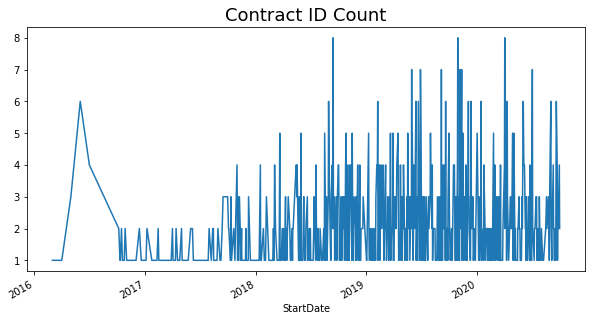

In [59]:
contracts_df.groupby(['StartDate'])['Id'].count().plot(kind='line',figsize = (10,5))
plt.title("Contract ID Count", size= 18)
plt.show()

Text(0, 0.5, 'ID Count')

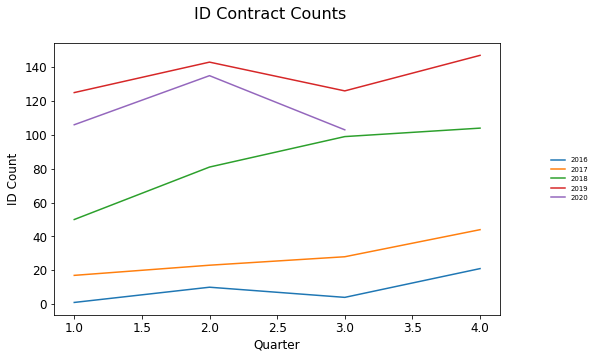

In [53]:
(contracts_df.groupby([contracts_df['StartDate'].dt.quarter,\
                       contracts_df['StartDate'].dt.year])\
 ['Id'].count()).unstack().plot(kind='line', figsize=(8,5))

plt.legend(loc='center left', bbox_to_anchor=(1.1, .5), fontsize='x-small', frameon=False)
plt.suptitle('ID Contract Counts', fontsize=16)
plt.tick_params(labelsize = 12)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('ID Count', fontsize=12)

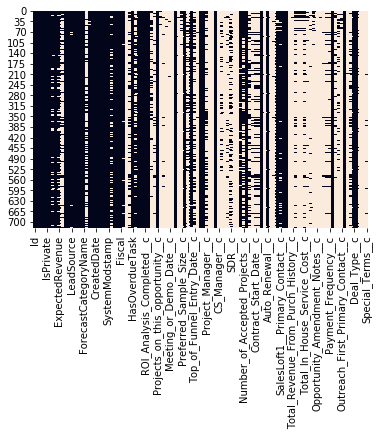

In [56]:
sns.heatmap(opps_df.isnull(), cbar=False)

# Objectives

## Objective #1

- Tell us the conversion rate of Pilot Opportunities to Annual Opportunities
  - On the opportunity object, there is a unique id that connects pilots opportunities to annuals
  - Annuals are defined as Type = Bulk
  - Pilots and Annuals are related upon the pilot being won
- What is the likelihood that an annual will be won when creating a pilot?
- What is the likelihood that an annual will be won when winning a pilot?

In [18]:
opps_df.Deal_Type__c.value_counts()

Transactional    549
Bulk             171
Name: Deal_Type__c, dtype: int64

In [45]:
pilot_df = opps_df.copy()

pilot_df = pilot_df[['Id','StageName','Amount', 'IsWon',\
         'Annual_Opportunity__c', 'Pilot_Opportunity__c', 'Platform_Type__c'\
, 'Opp_Category__c', 'Deal_Type__c', 'Is_Pilot__c']]

pilot_df

,Id,StageName,Amount,IsWon,Annual_Opportunity__c,Pilot_Opportunity__c,Platform_Type__c,Opp_Category__c,Deal_Type__c,Is_Pilot__c
0,0062M00000kbwE9QAI,Demo,35000.0,False,NaN,NaN,NaN,NaN,Transactional,Yes
1,0062M00000kbwPbQAI,Closed Won,74500.0,True,NaN,NaN,Honey Badger,Annual from Trans,Bulk,No
2,0062M00000kbwbXQAQ,Closed Lost,9150.0,False,NaN,NaN,Honey Badger,NaN,Transactional,No
3,0062M00000kbwdYQAQ,Closed Lost,234500.0,False,NaN,0062M00000jieRQQAY,Honey Badger,NaN,Transactional,Yes
4,0062M00000kbwv8QAA,Closed Lost,7090.0,False,NaN,NaN,Honey Badger,NaN,Transactional,No
...,...,...,...,...,...,...,...,...,...,...
716,0062M00000kw8LVQAY,Recommendation,NaN,False,NaN,NaN,NaN,NaN,Transactional,No
717,0062M00000kw8lvQAA,Recommendation,3500.0,False,NaN,NaN,NaN,NaN,Transactional,Yes
718,0062M00000kw8mtQAA,Discovery,3500.0,False,NaN,NaN,NaN,NaN,Transactional,Yes
719,0062M00000kw9SvQAI,Discovery,3500.0,False,NaN,NaN,NaN,NaN,Transactional,Yes


## Objective #2

- Of all the sessions requested how many are sold?
  - All Opportunities have a Session Request and all Session Requests that are Accepted are associated with the Session Record
- What requested Research Product is most likely to be sold? Explain how you came to that conclusion.
  - Sessions have Service Requests Records related to them, these records are the Products that are being requested by the sales team and relate back to the Product in our Product Catalog.

In [106]:
session_cs_df.Confirmed_Start_Time__c.isna

<bound method Series.isna of 0      2020-08-04T12:00:00.000+0000
1      2020-08-05T01:00:00.000+0000
2      2020-08-27T19:30:00.000+0000
3      2020-08-27T15:00:00.000+0000
4      2020-08-26T16:00:00.000+0000
                   ...             
587    2020-09-01T21:00:00.000+0000
588    2020-09-10T21:00:00.000+0000
589    2020-09-03T15:00:00.000+0000
590    2020-08-11T23:00:00.000+0000
591    2020-08-14T23:00:00.000+0000
Name: Confirmed_Start_Time__c, Length: 592, dtype: object>

In [108]:
sold = 592/859
sold

0.689173457508731

,Id,OwnerId,IsDeleted,Name,CreatedDate,CreatedById,LastModifiedDate,LastModifiedById,SystemModstamp,LastActivityDate,Notes__c,Order_Product__c,Product__c,Quantity__c,Remesh_Project__c,Service_Request__c,Session__c,Total_Price_Override__c,TEMP_Project_Product__c,Status__c
0,a3U2M000000V5qCUAS,0052M000008PvAJQA0,False,SP-4242,2020-08-03T13:16:18.000+0000,0052M000008PvAJQA0,2020-08-25T02:12:14.000+0000,0052M0000091zSnQAI,2020-09-17T19:37:54.000+0000,NaN,NaN,8022M00000E6fIKQAZ,01t2M000008JOuUQAW,1.0,a3P2M0000019UKVUA2,NaN,a3W2M000000W9YnUAK,0.0,NaN,NaN
1,a3U2M000000V5qMUAS,0052M000008PvAJQA0,False,SP-4243,2020-08-03T17:11:04.000+0000,0052M000008PvAJQA0,2020-08-11T16:43:03.000+0000,0052M0000091zSnQAI,2020-09-17T19:37:54.000+0000,NaN,NaN,8022M00000E6ZPVQA3,01t2M000008JOuUQAW,1.0,a3P2M000000tvUTUAY,NaN,a3W2M000000W9ZlUAK,0.0,NaN,NaN
2,a3U2M000000V5qRUAS,0054100000605WDAAY,False,SP-4244,2020-08-03T17:46:11.000+0000,0054100000605WDAAY,2020-08-27T21:20:35.000+0000,0052M0000091zSnQAI,2020-09-17T19:37:54.000+0000,NaN,NaN,8022M00000E6gJGQAZ,01t2M000008JOuUQAW,1.0,a3P2M0000019UONUA2,NaN,a3W2M000000W9a0UAC,NaN,NaN,NaN
3,a3U2M000000V5qWUAS,0054100000605WDAAY,False,SP-4245,2020-08-03T17:46:26.000+0000,0054100000605WDAAY,2020-08-28T19:00:19.000+0000,0052M0000091zSnQAI,2020-09-17T19:37:54.000+0000,NaN,NaN,8022M00000E6geRQAR,01t2M000008JOuUQAW,1.0,a3P2M0000019UOSUA2,NaN,a3W2M000000W9a5UAC,NaN,NaN,NaN
4,a3U2M000000V5qbUAC,0054100000605WDAAY,False,SP-4246,2020-08-03T17:46:42.000+0000,0054100000605WDAAY,2020-08-28T18:59:43.000+0000,0052M0000091zSnQAI,2020-09-17T19:37:54.000+0000,NaN,NaN,8022M00000E6geMQAR,01t2M000008JOuUQAW,1.0,a3P2M0000019UOXUA2,NaN,a3W2M000000W9aAUAS,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,a3U2M000002AeheUAC,0054100000605WDAAY,False,SP-4236,2020-07-31T18:05:12.000+0000,0054100000605WDAAY,2020-09-21T16:50:41.000+0000,0052M0000091zSnQAI,2020-09-21T16:50:41.000+0000,NaN,NaN,8022M00000E6rKLQAZ,01t2M000005NAvEQAW,10175.0,a3P2M000000tz3oUAA,NaN,a3W2M000000dW0JUAU,NaN,NaN,NaN
3141,a3U2M000002AehjUAC,0054100000605WDAAY,False,SP-4237,2020-07-31T18:05:31.000+0000,0054100000605WDAAY,2020-09-21T16:59:24.000+0000,0052M0000091zSnQAI,2020-09-21T16:59:24.000+0000,NaN,NaN,8022M00000E6rKQQAZ,01t2M000005NAvEQAW,11521.0,a3P2M000000tz3tUAA,NaN,a3W2M000000dW0OUAU,NaN,NaN,NaN
3142,a3U2M000002AehoUAC,00541000003qyb7AAA,False,SP-4238,2020-07-31T21:21:23.000+0000,00541000003qyb7AAA,2020-08-25T15:03:45.000+0000,0052M0000091zSnQAI,2020-09-17T19:37:55.000+0000,NaN,NaN,8022M00000E6fYvQAJ,01t2M000008JOtKQAW,1.0,a3P2M000000tz9DUAQ,a3R2M000000pQW3UAM,a3W2M000000dW17UAE,6100.0,NaN,NaN
3143,a3U2M000002AehpUAC,00541000003qyb7AAA,False,SP-4239,2020-07-31T21:21:23.000+0000,00541000003qyb7AAA,2020-08-25T15:03:45.000+0000,0052M0000091zSnQAI,2020-09-17T19:37:55.000+0000,NaN,NaN,8022M00000E6fYwQAJ,01t2M000008JOuUQAW,1.0,a3P2M000000tz9DUAQ,NaN,a3W2M000000dW17UAE,2500.0,NaN,NaN


In [136]:
# Merge csv documents

sdb = session_cs_df.merge(SessionProduct_df,how='left',on='Id')
sdb.shape

(592, 49)

In [148]:
session = SessionProduct_df.merge(product_df, how='left', on='Product__c')
session.shape

(3145, 27)

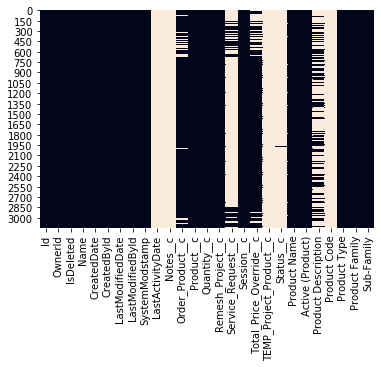

In [152]:
sns.heatmap(session.isnull(), cbar=False)

In [159]:
session.head()

,Id,OwnerId,IsDeleted,Name,CreatedDate,CreatedById,LastModifiedDate,LastModifiedById,SystemModstamp,LastActivityDate,...,Total_Price_Override__c,TEMP_Project_Product__c,Status__c,Product Name,Active (Product),Product Description,Product Code,Product Type,Product Family,Sub-Family
0,a3U2M000000V5qCUAS,0052M000008PvAJQA0,False,SP-4242,2020-08-03T13:16:18.000+0000,0052M000008PvAJQA0,2020-08-25T02:12:14.000+0000,0052M0000091zSnQAI,2020-09-17T19:37:54.000+0000,NaN,...,0.0,NaN,NaN,Conversation (60-min),1.0,NaN,NaN,Revenue,Product,Platform
1,a3U2M000000V5qMUAS,0052M000008PvAJQA0,False,SP-4243,2020-08-03T17:11:04.000+0000,0052M000008PvAJQA0,2020-08-11T16:43:03.000+0000,0052M0000091zSnQAI,2020-09-17T19:37:54.000+0000,NaN,...,0.0,NaN,NaN,Conversation (60-min),1.0,NaN,NaN,Revenue,Product,Platform
2,a3U2M000000V5qRUAS,0054100000605WDAAY,False,SP-4244,2020-08-03T17:46:11.000+0000,0054100000605WDAAY,2020-08-27T21:20:35.000+0000,0052M0000091zSnQAI,2020-09-17T19:37:54.000+0000,NaN,...,NaN,NaN,NaN,Conversation (60-min),1.0,NaN,NaN,Revenue,Product,Platform
3,a3U2M000000V5qWUAS,0054100000605WDAAY,False,SP-4245,2020-08-03T17:46:26.000+0000,0054100000605WDAAY,2020-08-28T19:00:19.000+0000,0052M0000091zSnQAI,2020-09-17T19:37:54.000+0000,NaN,...,NaN,NaN,NaN,Conversation (60-min),1.0,NaN,NaN,Revenue,Product,Platform
4,a3U2M000000V5qbUAC,0054100000605WDAAY,False,SP-4246,2020-08-03T17:46:42.000+0000,0054100000605WDAAY,2020-08-28T18:59:43.000+0000,0052M0000091zSnQAI,2020-09-17T19:37:54.000+0000,NaN,...,NaN,NaN,NaN,Conversation (60-min),1.0,NaN,NaN,Revenue,Product,Platform


In [161]:
session['Product Name'].value_counts()

Conversation (60-min)                                 1896
Sample                                                 885
Conversation (>90-min)                                  82
Active Participant Minute                               74
Conversation (90-min)                                   54
Discussion Guide, Moderation, Moderate Report           37
Discussion Guide, Moderation                            34
Discussion Guide, Moderation, Comprehensive Report      27
Onboarding Services                                     18
Discussion Guide, Moderation, Topline Report            17
Moderation                                               8
Sample & Translation Services                            4
Translation Fee                                          2
Translation Services                                     2
DG, Moderation, Topline Report                           1
3rd party mgmt fee                                       1
Moderation, Top-Line Reporting                          

## Objective #3

What is the average Booking value of Opportunities with sessions sold since July?

In [46]:
book_df = opps_df.copy()

book_df = book_df[['Id','StageName','Amount', 'IsWon',\
'Confirmed_Session_Date_Time__c']]

book_df

,Id,StageName,Amount,IsWon,Confirmed_Session_Date_Time__c
0,0062M00000kbwE9QAI,Demo,35000.0,False,NaN
1,0062M00000kbwPbQAI,Closed Won,74500.0,True,NaN
2,0062M00000kbwbXQAQ,Closed Lost,9150.0,False,2020-07-09T16:00:00.000+0000
3,0062M00000kbwdYQAQ,Closed Lost,234500.0,False,NaN
4,0062M00000kbwv8QAA,Closed Lost,7090.0,False,2020-07-14T23:00:00.000+0000
...,...,...,...,...,...
716,0062M00000kw8LVQAY,Recommendation,NaN,False,NaN
717,0062M00000kw8lvQAA,Recommendation,3500.0,False,NaN
718,0062M00000kw8mtQAA,Discovery,3500.0,False,NaN
719,0062M00000kw9SvQAI,Discovery,3500.0,False,NaN


In [66]:
# Remove null values in Confirmed_Session_Date_Time__c

zero_dict = {0: np.nan}
book_df['Confirmed_Session_Date_Time__c'].replace(zero_dict, inplace = True)
book_df.dropna(inplace = True)
book_df.shape

(10, 5)

In [73]:
book_df.groupby([book_df.StageName == 'Closed Won'])['Amount'].mean().round(2)

StageName
False    10598.33
True     13487.50
Name: Amount, dtype: float64

In [74]:
book_df

,Id,StageName,Amount,IsWon,Confirmed_Session_Date_Time__c
2,0062M00000kbwbXQAQ,Closed Lost,9150.0,False,2020-07-09T16:00:00.000+0000
4,0062M00000kbwv8QAA,Closed Lost,7090.0,False,2020-07-14T23:00:00.000+0000
19,0062M00000kc2WUQAY,Closed Lost,10000.0,False,2020-08-03T19:00:00.000+0000
20,0062M00000kc44SQAQ,Closed Won,10600.0,True,2020-08-04T19:00:00.000+0000
22,0062M00000kc51NQAQ,Closed Won,10000.0,True,2020-07-21T23:00:00.000+0000
24,0062M00000kc6E3QAI,Closed Won,10500.0,True,2020-07-13T20:00:00.000+0000
47,0062M00000kcCkqQAE,Closed Lost,12000.0,False,2020-07-14T02:00:00.000+0000
54,0062M00000kcF70QAE,Closed Won,22850.0,True,2020-07-17T00:00:00.000+0000
62,0062M00000kcHIrQAM,Closed Lost,10350.0,False,2020-08-20T16:00:00.000+0000
64,0062M00000kcHmrQAE,Closed Lost,15000.0,False,2020-08-04T19:00:00.000+0000


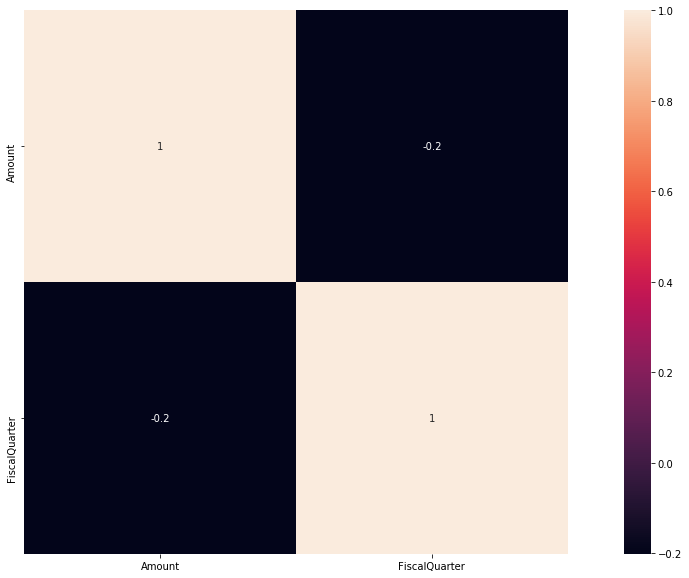

In [76]:
corrmat = opps_df[['StageName','Amount','FiscalQuarter'\
             ]].corr()
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrmat,square=True,annot=True)